# My Programming for Data Analytics Project

**By Joanne Feeney**
***

For this project, I will:

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage).
- Examine Irish context e.g. Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect).
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage).

Importing different packages that I will use in this notebook

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Reading in data provided by the lecturer & skipping rows that are not required.

Composite (Co2) data:

In [2]:
# Naming as df1 and reading it into python
df1 = pd.read_csv("data\Temperature_data_from_NOAA_3.csv", skiprows=14)

Jouzel (temperature) data:

In [3]:
# Naming as df2 and reading it into python
df2 = pd.read_csv("data\Temperature_data_from_Jouzel.csv")

Luthi et. al. data already included as part of NOAA csv.

[1]

I begin comparing columns and seeing what information I require for this project. I can see from F.Parrenin et. al.'s paper [2], that EDC3 / yr BP and any other variations of this column name on the other datasets means years before AD1950 which clears things up for me.

In [4]:
# Dropping NaN columns in composite data (Geeksforgeeks)
df1.drop(['Unnamed: 3', 'Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)

[3]

Using df1.info() to find out more information about the dataset. From this we can see there are 1901 entries and there are only float data types.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


Using df1.describe() to see the maximum, minimum, mean etc. of each of the  variables.

In [6]:
df1.describe()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
count,1901.000000,1901.000000,1901.000000
mean,242810.270447,235.566691,1.340284
std,274261.195334,35.902706,0.924241
min,-51.030000,173.710000,0.010000
25%,14606.210000,204.830000,0.640000
50%,74525.650000,232.460000,1.070000
75%,504177.190000,257.930000,1.800000
max,805668.870000,368.020000,9.960000


Using df.isnull().sum() to check if there are any null/NaN entries in the dataset.

In [7]:
df1.isnull().sum()

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64

Adding column names.

In [8]:
# Adding columns
df1.columns =['Years before AD1950', 'Co2 levels', 'Sigma mean of Co2']

By using all of the above quick python codes, we can already make some assumptions about the composite Co2 dataset. We can see that there are some columns with missing values, which we have dropped. Each of the three variables we require has a count of 1901. 

We only have one types of variable, floats. There are no null values in the three columsn that we will be using for Co2.

Plotting the entire dataset Co2 history to compare levels in the atmosphere from 800,000 years ago to present day

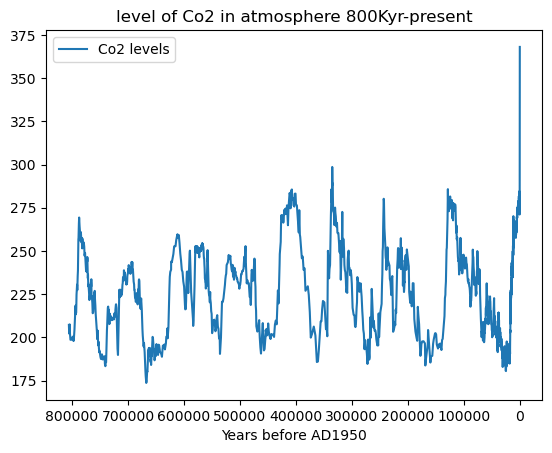

In [9]:
# Plotting all variables and inverting x axis (Stackoverflow.com)
df1.plot(x='Years before AD1950', y='Co2 levels', title='level of Co2 in atmosphere 800Kyr-present').invert_xaxis();

[4]

Taking a closer look at the last 50 years

In [10]:
# Creating a variable for recent years
df1_present = df1[0:62]

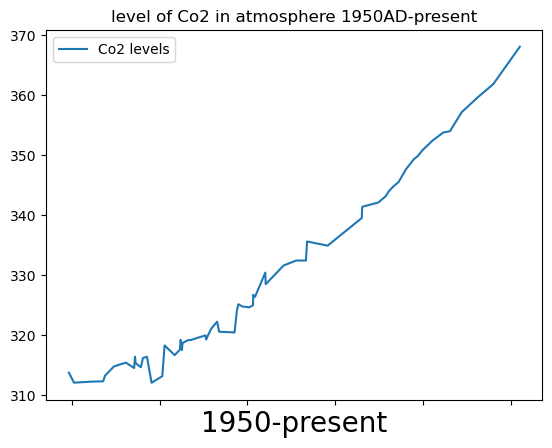

In [11]:
# Plotting from 1950 on and inverting x axis (Stackoverflow.com) (Pythonguides.com)
ax = df1_present.plot(x='Years before AD1950', y='Co2 levels', title='level of Co2 in atmosphere 1950AD-present').invert_xaxis();
plt.xlabel('1950-present', size=20);
plt.tick_params(axis='x', labelbottom=False)

[5]

From the above, we can see that the levels of Co2 in the atmosphere has significantly increased in comparison to any amount of time in the past 800,000 years

Now let's look at temperature data.

In [12]:
# Dropping columns data bar year and temperature (Geeksforgeeks)
df2.drop(['bag', 'ztop', 'AICC2012', 'deutfinal', 'acc-EDC3beta'], axis=1, inplace=True)

In [13]:
df2.head()

,EDC3béta,temp
0,-50.00000,218.3
1,-43.55977,218.3
2,-37.44019,218.3
3,-31.64156,218.3
4,-24.55278,218.3


In [14]:
# Adding columns
df2.columns =['Years before AD1950', 'Temperature']

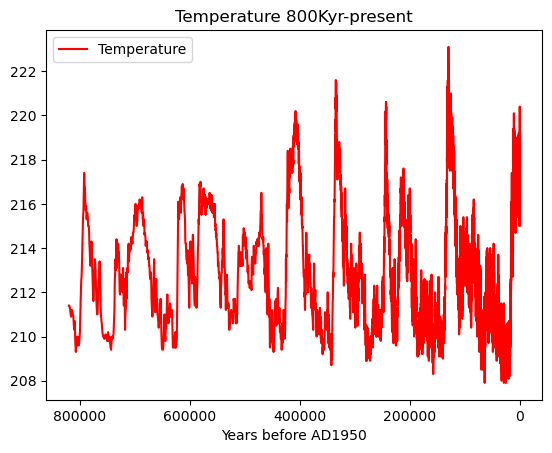

In [15]:
# Plotting all variables and inverting x axis (Stackoverflow.com)
df2.plot(x='Years before AD1950', y='Temperature', title='Temperature 800Kyr-present', color='r').invert_xaxis();

Creating a variable which contains both temperature & Co2 data.

In [16]:
# Merging datasets together (Python for MBAs)
df_fused = pd.merge(df1, 
                    df2,
                    left_on='Years before AD1950',
                    right_on='Years before AD1950',
                    how='outer')

[1]

I will add a plot with both Co2 and temperature data here.

The one other feature that I will be investigating as part of this project will be polar ice coverage.

In [17]:
# Reading in ice dataset that I found online
df_ice_mass_loss = pd.read_csv("data\cumulative-ice-mass-loss-and.csv")

In [18]:
# Dropping columns
df_ice_mass_loss.drop(['Cumulative ice mass loss (Greenland):number', 'Greenland Cumulative ice mass loss:number','Greenland Lower bound:number',
                       'Greenland Upper bound:number', 'Antarctic Cumulative mass loss uncertanty:number', 
                       'Antarctic Lower bound:number', 'Antarctic Upper bound:number'], axis=1, inplace=True)

In [27]:
# Removing numbers after decimal point (Geeksforgeeks.com)
year = df_ice_mass_loss['Year:number']

lst = [] 
for each in year: 
    lst.append(str(each).split('.')[0]) 
  
# Converting to integer data type 
final_list = [int(i) for i in lst]

[9]

In [29]:
df_ice_mass_loss.insert(1, 'Year', final_list)

In [32]:
df_ice_mass_loss.drop('Year:number', axis=1, inplace=True)

In [37]:
# Assigning Year column to datetime format
pd.to_datetime(df_ice_mass_loss['Year'], format='%Y');

[10]

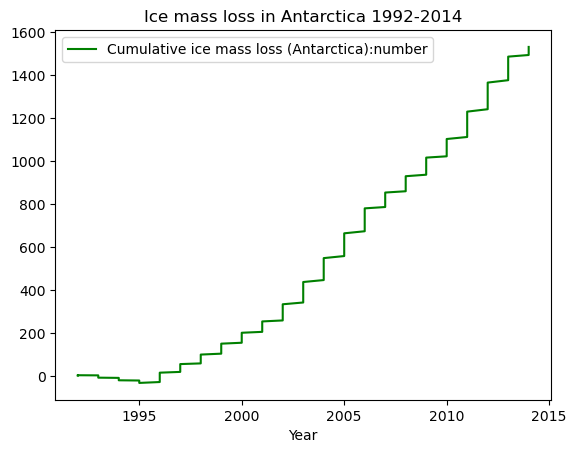

In [40]:
# Plotting all variables
df_ice_mass_loss.plot(x='Year', y='Cumulative ice mass loss (Antarctica):number', title='Ice mass loss in Antarctica 1992-2014', color='g');

In [46]:
# Reading in another ice dataset that I found online
df_sea_ice = pd.read_csv("data\Sea_Ice_Index_Monthly_Data_by_Year.csv")

In [48]:
#Dropping NaN column
df_sea_ice.drop('Unnamed: 13', axis=1, inplace=True)

In [50]:
# Assigning Year column to datetime format
pd.to_datetime(df_sea_ice['Year'], format='%Y');

In [49]:
df_sea_ice.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.645,13.667,12.673
1,1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336,12.328
2,1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593,12.337
3,1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341,12.127
4,1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642,12.447


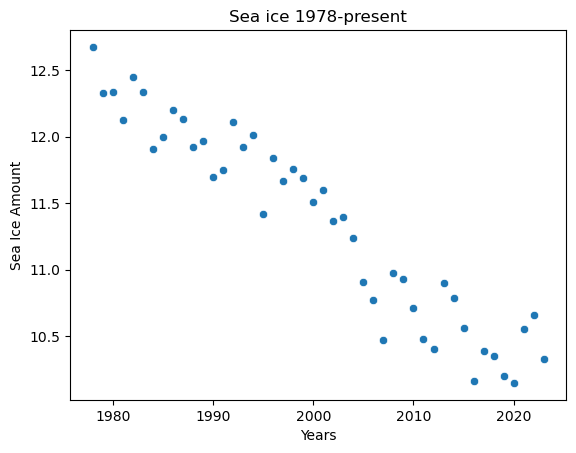

In [60]:
# Scatterplot of data
ax = sns.scatterplot(df_sea_ice, x='Year', y='Annual')
ax.set(xlabel='Years', ylabel='Sea Ice Amount', title='Sea ice 1978-present');

For the Irish context, I read: 

"The emergence of a climate change signal in long-term Irish meteorological observations" (https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13) 

I will speak briefly about what I think the data that I am investigating means for our country.

I have fused the Jouzel and Luthi et. al. (temperature & Co2) data to a variable called df_fused and will export that to csv and JSON formats.

Below, I  will predict global temperature anomaly for the next few decades as best I can and will compare my findings to current published data.

### Conclusion
***

### References

[1] Python for MBAs, Griffel & Guetta, Columbia Business School Publishing, 2021, eBook Academic Collection (EBSCOhost), (https://web.s.ebscohost.com/ehost/ebookviewer/ebook/ZTAwMHh3d19fMjQ1ODcyM19fQU41?sid=9d53254f-59d9-4f57-baa5-1b1ed8837cce@redis&vid=3&format=EB), chapter 7.6 JOINS IN PANDAS, last accessed 20/12/23

[2] The EDC3 chronology for the EPICA Dome C icecore, F.Parrenin et. al., 2007 (https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf), last accessed 20/12/23

[3] Geeksforgeeks.com, (https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/), last accessed 20/12/23

[4] Stackoverflow.com, (https://stackoverflow.com/questions/28837123/pyplot-reverse-x-axis-and-reverse-table-subplot), last accessed 22/12/23

[5] Pythonguides.com, (https://pythonguides.com/matplotlib-tick-params/), last accessed 22/12/23

[6] Stackoverflow.com, (https://stackoverflow.com/questions/26045779/how-to-turn-all-numbers-in-a-list-into-their-negative-counterparts),  last accessed 22/12/23

[9] Geeksforgeeks.com, (https://www.geeksforgeeks.org/how-to-remove-all-decimals-from-a-number-using-python/), last accessed 29/12/23

[10] Saturncloud.io, (https://saturncloud.io/blog/converting-object-column-in-pandas-dataframe-to-datetime-a-data-scientists-guide/#:~:text=To%20convert%20this%20column%20to,to_datetime()%20method.&text=In%20this%20example%2C%20we%20used,'%20)%2C%20and%20the%20pd.), last accessed 29/12/23

### Datasets

[7] European Environment Agency, [cumulative-ice-mass-loss-and.csv] (https://www.eea.europa.eu/data-and-maps/daviz/cumulative-ice-mass-loss-and#tab-dashboard-01), last accessed 27/12/23

[8] NOAA, [Sea_Ice_Index_Monthly_Data_by_Year.csv] (https://noaadata.apps.nsidc.org/NOAA/G02135/seaice_analysis/), Last accessed 27/12/23

In [20]:
'''# Merging datasets together (Python for MBAs)
df_fuse1 = pd.merge(df1, 
                    df2,
                    left_on='CO2 (ppmv)',
                    right_on='CO2 (ppmv)',
                    how='outer')'''

"# Merging datasets together (Python for MBAs)\ndf_fuse1 = pd.merge(df1, \n                    df2,\n                    left_on='CO2 (ppmv)',\n                    right_on='CO2 (ppmv)',\n                    how='outer')"

***
## The End